In [37]:
#load the dataset old data loader, not pickl file
#import gzip 


#def load_txt_gz(file_path):
#    with gzip.open(file_path, 'rt', errors='ignore') as file:
#        content = [line.strip() for line in file]
#    return content

#file_path = 'C:/Users/nicco/OneDrive - ETH Zurich/Master EST/23FS - DTU/Computational Social Science/Ass3_4/quotes_2008-08.txt.gz'
#content = load_txt_gz('quotes_2008-08.txt.gz')

# Print the first few lines to inspect the content
#for line in content[:10]:
 #   print(line)

In [46]:
import pickle

with open('data/preprossed_data.pickle', 'rb') as file:
    content = pickle.load(file)

In [47]:
#Check RAM usage
import os
import psutil

def print_used_ram():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    used_ram = mem_info.rss / (1024 * 1024)  # Convert to MB
    print(f"Used RAM: {used_ram:.2f} MB")

print_used_ram()

Used RAM: 5404.55 MB


In [48]:
import networkx as nx
from textblob import TextBlob
from collections import defaultdict
import nltk
from nltk.corpus import stopwords
from math import log
import time


nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

def preprocess_and_get_sentiment_score(phrase):
    tokens = nltk.word_tokenize(phrase)
    non_stopwords = [word for word in tokens if word.lower() not in stop_words]
    non_stopword_count = len(non_stopwords)
    filtered_phrase = ' '.join(non_stopwords)
    sentiment_score = TextBlob(filtered_phrase).sentiment.polarity
    return sentiment_score, non_stopword_count

start = time.time()

# Initialize an empty graph
G = nx.DiGraph()

current_node = None
counter=0

sentiment_scores = defaultdict(float)
non_stopword_counts = defaultdict(int)

content = content
n_lines = len(content)
for line in content:
    counter += 1
     
    parts = line.split("\t")
    
    if parts[0] == "P":
        current_node = parts[1].strip()
        G.add_node(current_node, name=current_node, key_phrases=[], links=[])
    elif current_node is not None:
        if parts[0] == "T":
            G.nodes[current_node]["timestamp"] = parts[1].strip()
        elif parts[0] == "Q":
            phrase = parts[1].strip()
            G.nodes[current_node]["key_phrases"].append(phrase)
            sentiment_score, non_stopword_count = preprocess_and_get_sentiment_score(phrase)
            sentiment_scores[current_node] += sentiment_score
            non_stopword_counts[current_node] += non_stopword_count
        elif parts[0] == "L":
            link = parts[1].strip()
            if not G.has_node(link):
                G.add_node(link, name=link, key_phrases=[], links=[])
            G.add_edge(current_node, link)
    
    if counter % 10**4 == 0:
        print(f"{counter/n_lines} in {(time.time() - start)/60} minuts")
        
for node in G.nodes:
    non_stopword_count = non_stopword_counts[node]
    if non_stopword_count not in [0,1]:
        log_non_stopword_count = log(non_stopword_count)
        normalized_sentiment_score = sentiment_scores[node] / log_non_stopword_count
    else:
        normalized_sentiment_score = sentiment_scores[node]
    G.nodes[node]["normalized_sentiment_score"] = normalized_sentiment_score
    if normalized_sentiment_score < -0.4:
        G.nodes[node]["sentiment_color_group"] = 0
    elif -0.4 <= normalized_sentiment_score < -0.2:
        G.nodes[node]["sentiment_color_group"] = 1
    elif -0.2 <= normalized_sentiment_score < -0.05:
        G.nodes[node]["sentiment_color_group"] = 2
    elif -0.05 <= normalized_sentiment_score < 0.05:
        G.nodes[node]["sentiment_color_group"] = 3
    elif 0.05 <= normalized_sentiment_score < 0.2:
        G.nodes[node]["sentiment_color_group"] = 4
    elif 0.2 <= normalized_sentiment_score < 0.4:
        G.nodes[node]["sentiment_color_group"] = 5
    elif 0.4 <= normalized_sentiment_score:
        G.nodes[node]["sentiment_color_group"] = 6
    
        
stop = time.time()
print(f"time taken to process: {(stop - start)/60} minuts")

# Now G contains the network created from the list
#save for later use
pickle.dump(G, open('data/G_sentiment.pickle', 'wb'))
G_full_backup = G

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ejer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ejer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0.0009821072820603274 in 0.04636386235555013 minuts
0.001964214564120655 in 0.08430668910344442 minuts
0.0029463218461809825 in 0.12113986412684123 minuts
0.00392842912824131 in 0.15802899599075318 minuts
0.004910536410301637 in 0.19325393835703533 minuts
0.005892643692361965 in 0.2302962025006612 minuts
0.006874750974422293 in 0.26479740142822267 minuts
0.00785685825648262 in 0.2987905939420064 minuts
0.008838965538542947 in 0.3332615613937378 minuts
0.009821072820603275 in 0.36921717325846354 minuts
0.010803180102663602 in 0.40660096804300944 minuts
0.01178528738472393 in 0.43479190667470297 minuts
0.012767394666784258 in 0.46274245977401735 minuts
0.013749501948844585 in 0.49172524611155194 minuts
0.014731609230904913 in 0.518275245030721 minuts
0.01571371651296524 in 0.5460419893264771 minuts
0.016695823795025568 in 0.5715425252914429 minuts
0.017677931077085894 in 0.5985919674237569 minuts
0.018660038359146223 in 0.6269586404164632 minuts
0.01964214564120655 in 0.6548925081888834 

0.1669582379502557 in 4.764906748135885 minuts
0.167940345232316 in 4.7926184892654415 minuts
0.16892245251437632 in 4.819832873344422 minuts
0.16990455979643665 in 4.846787234147389 minuts
0.17088666707849698 in 4.874283190568288 minuts
0.1718687743605573 in 4.902750126520792 minuts
0.17285088164261764 in 4.929812788963318 minuts
0.17383298892467797 in 4.955791997909546 minuts
0.1748150962067383 in 4.982333548863729 minuts
0.17579720348879863 in 5.008577080567678 minuts
0.17677931077085896 in 5.0352496862411495 minuts
0.17776141805291928 in 5.066786885261536 minuts
0.1787435253349796 in 5.094999301433563 minuts
0.17972563261703994 in 5.122666517893474 minuts
0.18070773989910027 in 5.150546928246816 minuts
0.1816898471811606 in 5.178045690059662 minuts
0.1826719544632209 in 5.2047500014305115 minuts
0.18365406174528123 in 5.231817317008972 minuts
0.18463616902734156 in 5.257369581858317 minuts
0.1856182763094019 in 5.2839344104131065 minuts
0.18660038359146222 in 5.309436297416687 minu

0.3368627977466923 in 9.453150320053101 minuts
0.33784490502875264 in 9.479636092980703 minuts
0.33882701231081297 in 9.504667874177297 minuts
0.3398091195928733 in 9.53103193839391 minuts
0.34079122687493363 in 9.558148662249247 minuts
0.34177333415699396 in 9.58418338696162 minuts
0.3427554414390543 in 9.610264027118683 minuts
0.3437375487211146 in 9.63776782353719 minuts
0.34471965600317495 in 9.665107838312785 minuts
0.3457017632852353 in 9.693099884192149 minuts
0.3466838705672956 in 9.72133959531784 minuts
0.34766597784935593 in 9.749545741081239 minuts
0.34864808513141626 in 9.77616882721583 minuts
0.3496301924134766 in 9.80259937842687 minuts
0.3506122996955369 in 9.829550309975941 minuts
0.35159440697759725 in 9.855896377563477 minuts
0.3525765142596576 in 9.882501816749572 minuts
0.3535586215417179 in 9.917566386858622 minuts
0.35454072882377824 in 9.958286142349243 minuts
0.35552283610583857 in 10.006097559134165 minuts
0.3565049433878989 in 10.049507927894592 minuts
0.35748

0.5048031429790083 in 14.518014589945475 minuts
0.5057852502610687 in 14.545448056856792 minuts
0.506767357543129 in 14.573329357306163 minuts
0.5077494648251893 in 14.611837371190388 minuts
0.5087315721072496 in 14.640229372183482 minuts
0.50971367938931 in 14.667481327056885 minuts
0.5106957866713703 in 14.694187124570211 minuts
0.5116778939534307 in 14.722325825691223 minuts
0.5126600012354909 in 14.751129579544067 minuts
0.5136421085175513 in 14.779377082983652 minuts
0.5146242157996116 in 14.806220904986064 minuts
0.515606323081672 in 14.833608384927114 minuts
0.5165884303637323 in 14.862101074059805 minuts
0.5175705376457926 in 14.887825743357341 minuts
0.5185526449278529 in 14.915257592995962 minuts
0.5195347522099133 in 14.94179774125417 minuts
0.5205168594919736 in 14.968525870641072 minuts
0.521498966774034 in 14.9966104666392 minuts
0.5224810740560942 in 15.023725239435832 minuts
0.5234631813381546 in 15.05112809340159 minuts
0.5244452886202149 in 15.078077816963196 minuts
0

0.674707702775445 in 19.21484810511271 minuts
0.6756898100575053 in 19.242296175161997 minuts
0.6766719173395657 in 19.270114652315776 minuts
0.6776540246216259 in 19.298277564843495 minuts
0.6786361319036863 in 19.326243595282236 minuts
0.6796182391857466 in 19.354066809018452 minuts
0.680600346467807 in 19.38182024161021 minuts
0.6815824537498673 in 19.4082749803861 minuts
0.6825645610319276 in 19.435510206222535 minuts
0.6835466683139879 in 19.46270751953125 minuts
0.6845287755960483 in 19.49009694655736 minuts
0.6855108828781086 in 19.518338425954184 minuts
0.686492990160169 in 19.54709201256434 minuts
0.6874750974422292 in 19.576277363300324 minuts
0.6884572047242896 in 19.603942688306173 minuts
0.6894393120063499 in 19.631126781304676 minuts
0.6904214192884103 in 19.657859309514365 minuts
0.6914035265704706 in 19.685146979490916 minuts
0.6923856338525309 in 19.713426633675894 minuts
0.6933677411345912 in 19.741059080759683 minuts
0.6943498484166516 in 19.809521329402923 minuts
0.

0.8446122625718817 in 24.134391558170318 minuts
0.845594369853942 in 24.16179606517156 minuts
0.8465764771360024 in 24.188528231779735 minuts
0.8475585844180626 in 24.21560925245285 minuts
0.8485406917001229 in 24.24299273490906 minuts
0.8495227989821833 in 24.27049250602722 minuts
0.8505049062642436 in 24.298993655045827 minuts
0.851487013546304 in 24.327968736489613 minuts
0.8524691208283642 in 24.35653571287791 minuts
0.8534512281104246 in 24.384278329213462 minuts
0.8544333353924849 in 24.412460478146873 minuts
0.8554154426745453 in 24.440256583690644 minuts
0.8563975499566056 in 24.468109834194184 minuts
0.8573796572386659 in 24.495965003967285 minuts
0.8583617645207262 in 24.523856425285338 minuts
0.8593438718027866 in 24.551993465423585 minuts
0.8603259790848469 in 24.580333201090493 minuts
0.8613080863669073 in 24.608971949418386 minuts
0.8622901936489675 in 24.63735858599345 minuts
0.8632723009310279 in 24.665708176294963 minuts
0.8642544082130882 in 24.6943990111351 minuts
0.

In [ ]:
G = G_full_backup

In [ ]:
G.number_of_nodes()

In [89]:
# Compute the weakly connected components in the graph
weakly_connected_components = list(nx.weakly_connected_components(G))

# Sort the components by size in descending order
sorted_weakly_connected_components = sorted(weakly_connected_components, key=len, reverse=True)

# Select the 100 largest components
hundred_largest_weakly_connected_components = sorted_weakly_connected_components[:100]

# Create subgraphs for each of the 10 largest components
hundred_largest_weakly_connected_subgraphs = [G.subgraph(component) for component in hundred_largest_weakly_connected_components]


In [ ]:
import pickle
#save the largest connected components for later
for i, graph in enumerate(ten_largest_weakly_connected_subgraphs):
    # Convert the subgraph view to a regular DiGraph
    graph_to_pickle = nx.DiGraph(graph)
    
    with open(f"data/component{i}.pickle", "wb") as file:
        pickle.dump(graph_to_pickle, file)

In [ ]:
# Create a subgraph containing nodes with key phrases that contain "obama" or "Obama"
obama_nodes = [node for node, attrs in G.nodes(data=True) if any("obama" in phrase.lower() for phrase in attrs["key_phrases"])]
obama_subgraph = G.subgraph(obama_nodes)
graph_to_pickle = nx.DiGraph(obama_subgraph)

with open(f"data/Obama.pickle", "wb") as file:
    pickle.dump(graph_to_pickle, file)

In [58]:
with open(f"data/Obama.pickle", "rb") as file:
    obama_graph = pickle.load(file)

In [91]:
#Create new graph that is the subgraph containing the top 100 largest connected components
new_graph_top_connected = nx.DiGraph()
for subgraph in hundred_largest_weakly_connected_subgraphs:
    new_graph_top_connected = nx.compose(new_graph_top_connected, subgraph)
G = new_graph_top_connected


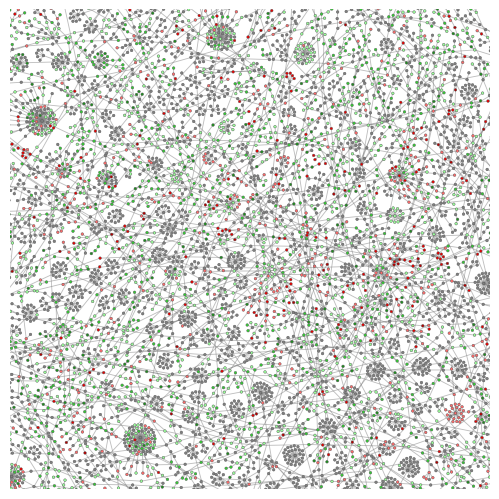

In [108]:
import matplotlib.pyplot as plt
import networkx as nx
import netwulf as nw
import numpy as np

# Customize the network visualization styles

color_map= {
    0: "#b30000",  # Dark red (closer to light red)
    1: "#e60000",  # Red
    2: "#ff6a6a",  # Light red
    3: "#808080",  # Gray
    4: "#99ff99",  # Light green
    5: "#33cc33",  # Medium green
    6: "#1e8e1e"   # Dark green (closer to light green)
}

for node in G.nodes:
    G.nodes[node]["group"] = color_map[G.nodes[node]["sentiment_color_group"]]

dict = nx.get_node_attributes(G,'group')

# Draw the graph with node colors based on their sentiment scrore
dict = nx.get_node_attributes(G,'sentiment score')
nx.set_node_attributes(G,dict,"group")
results = nw.visualize(G)

In [103]:
for node in G.nodes:
    G.nodes[node]["group"] = colormap[G.nodes[node]["sentiment_color_group"]]

{0: '#b30000',
 1: '#e60000',
 2: '#ff6666',
 3: '#808080',
 4: '#99ff99',
 5: '#33cc33',
 6: '#1e8e1e'}

In [26]:
import networkx as nx
import community
import netwulf as nw

print(G.number_of_edges())
print(G.number_of_nodes())
#Import the network
components = list(nx.weakly_connected_components(G))
largest_component = max(components, key=len)
G_con = G.subgraph(largest_component)
print(G_con.number_of_edges())
print(G_con.number_of_nodes())

370
371
370
371


In [34]:
G = G.to_undirected()

The number of communities are: 13725
The modularity is :  0.9957992890302614  Whcih is significantly above 0


<function matplotlib.pyplot.show(close=None, block=None)>

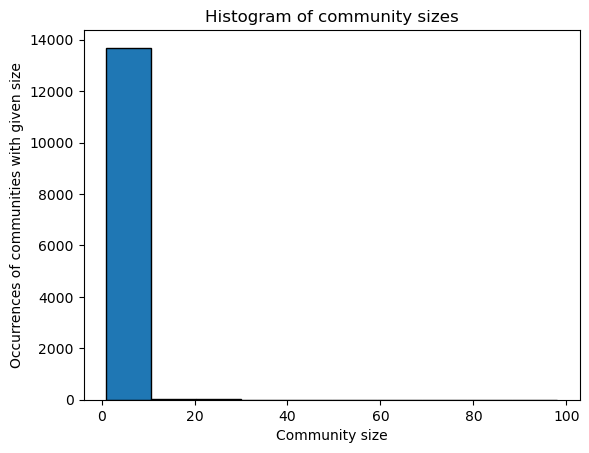

In [35]:
# Find communities using the Louvain algorithm
partition = community.best_partition(G)

# Compute the modularity of the partition
modularity = community.modularity(partition, G)

#Compute then number of communities
n_comm = len(set(partition.values()))

# Print the modularity value
print('The number of communities are:', str(n_comm))
print('The modularity is : ', modularity, " Whcih is significantly above 0")

#Create histogram showing community size distribution
count_dict = {}

# Loop over the values of the dictionary
for value in partition.values():
    if value in count_dict:
        count_dict[value] += 1
    else:
        count_dict[value] = 1
        
plt.hist(count_dict.values(), edgecolor='black')
plt.xlabel('Community size')
plt.ylabel('Occurrences of communities with given size')
plt.title('Histogram of community sizes')
plt.show

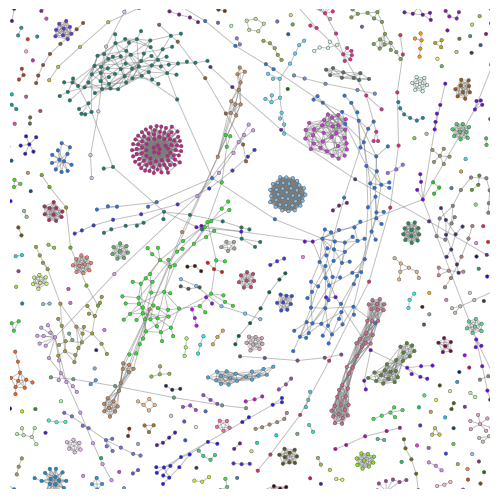

In [36]:
# Visualization using netwulf
nx.set_node_attributes(G,partition,"group")

#Write community assignment to txt for later use
with open('partition.txt', 'w') as file:
    for node, community in partition.items():
        file.write(str(node) + ',' + str(community) + '\n')

results = nw.visualize(G)

In [ ]:
from collections import defaultdict, Counter

# Count the number of nodes in each community
community_node_counts = defaultdict(int)
for community in partition.values():
    community_node_counts[community] += 1

# Sort the communities by size in descending order
sorted_communities = [comm for comm, _ in Counter(community_node_counts).most_common(10)]

# Extract the subnetworks for each of the 10 largest communities
largest_community_subgraphs = []

for comm in sorted_communities:
    # Get the nodes belonging to the current community
    community_nodes = [node for node, community in partition.items() if community == comm]

    # Extract the subgraph for the current community
    community_subgraph = G_con.subgraph(community_nodes)
    
    # Add the subgraph to the list of largest community subgraphs
    largest_community_subgraphs.append(community_subgraph)


In [ ]:
new_graph = nx.DiGraph()
for component in largest_100_weakly_connected_components:
    subgraph = G.subgraph(component)
    new_graph = nx.compose(new_graph, subgraph)

In [9]:
# Calculate summary statistics
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
avg_degree = sum(dict(G.degree()).values()) / num_nodes
density = nx.density(G)

# Print summary statistics
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Average degree: {avg_degree:.2f}")
print(f"Density: {density:.4f}")

# Calculate and print some additional statistics if the graph is not empty
if num_nodes > 0:
    in_degrees = dict(G.in_degree())
    out_degrees = dict(G.out_degree())
    
    max_in_degree_node = max(in_degrees, key=in_degrees.get)
    max_out_degree_node = max(out_degrees, key=out_degrees.get)
    
    print(f"Node with maximum in-degree: {max_in_degree_node} (in-degree: {in_degrees[max_in_degree_node]})")
    print(f"Node with maximum out-degree: {max_out_degree_node} (out-degree: {out_degrees[max_out_degree_node]})")

    # Calculate connected components for a weakly connected version of the graph
    G_weak = nx.DiGraph.to_undirected(G)
    connected_components = [c for c in nx.connected_components(G_weak)]
    num_connected_components = len(connected_components)
    largest_connected_component = max(connected_components, key=len)
    
    print(f"Number of connected components: {num_connected_components}")
    print(f"Size of the largest connected component: {len(largest_connected_component)}")

Number of nodes: 17169
Number of edges: 19011
Average degree: 2.21
Density: 0.0001
Node with maximum in-degree: http://trishjones.com/is-link-building-unethical (in-degree: 79)
Node with maximum out-degree: http://f1.gpupdate.net/en/news/2008/08/04/bridgestone-suspects-sidewall-puncture-for-hamilton (out-degree: 31)
Number of connected components: 13724
Size of the largest connected component: 187


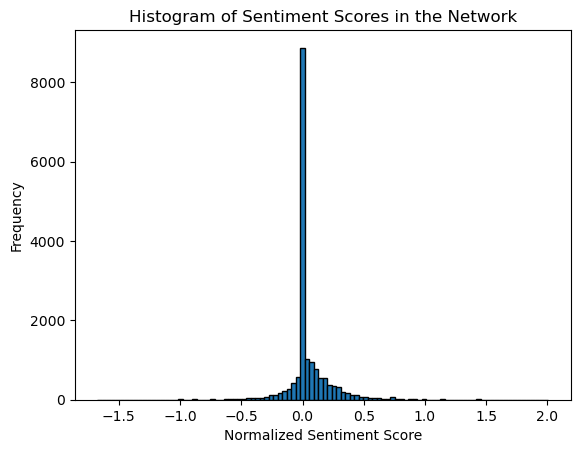

Assortativity coefficient based on sentiment scores: 0.6486
time taken to process: 0.1555666128794352 minuts


In [19]:
import matplotlib.pyplot as plt
start=time.time()
# Collect sentiment scores from all nodes
sentiment_scores_list = [attributes["normalized_sentiment_score"] for _, attributes in G.nodes(data=True)]

# Plot the histogram of sentiment scores
plt.hist(sentiment_scores_list, bins=100, edgecolor='black')
plt.xlabel('Normalized Sentiment Score')
plt.ylabel('Frequency')
plt.title('Histogram of Sentiment Scores in the Network')
plt.show()

# Compute the assortativity coefficient based on sentiment scores
sentiment_assortativity = nx.attribute_assortativity_coefficient(G, "normalized_sentiment_score")
print(f"Assortativity coefficient based on sentiment scores: {sentiment_assortativity:.4f}")
stop=time.time()
print(f"time taken to process: {(stop - start)/60} minuts")

In [17]:
import matplotlib.pyplot as plt
import networkx as nx
import netwulf as nw
import numpy as np

# Discretize sentiment scores into bins
sentiment_scores_list = [attributes["normalized_sentiment_score"] for _, attributes in G.nodes(data=True)]
num_bins = 10
sentiment_bins = np.linspace(min(sentiment_scores_list), max(sentiment_scores_list), num_bins + 1)
bin_indices = np.digitize(sentiment_scores_list, sentiment_bins) - 1

# Assign each node a bin ID as the group attribute
for idx, node in enumerate(G.nodes()):
    G.nodes[node]["group"] = bin_indices[idx]

# Customize the network visualization styles
styles = {
    "Node": {
        "color_map": {
            0: "#800000",
            1: "#ff0000",
            2: "#ff6600",
            3: "#ffcc00",
            4: "#ffff00",
            5: "#ccff00",
            6: "#99ff00",
            7: "#33ff00",
            8: "#00ff00",
            9: "#008000"
        }
    },
}
dict = nx.get_node_attributes(G,'group')

# Draw the graph with node colors based on their sentiment scrore
dict = nx.get_node_attributes(G,'sentiment score')
nx.set_node_attributes(G,dict,"group")
results = nw.visualize(G)

In [14]:
import netwulf as nw
results = nw.visualize(G)

C:\Users\Ejer\AppData\Local\Temp\ipykernel_11936\4258825456.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bins = np.linspace(math.floor(min(X)), math.ceil(max(X)), np.round(math.ceil(max(X))/100).astype(np.int)) #create bins with width of two
C:\Users\Ejer\AppData\Local\Temp\ipykernel_11936\4258825456.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or

IndexError: index 1 is out of bounds for axis 0 with size 1

In [34]:
import community
partition = nx.community.girvan_newman(G)
partition.attr

AttributeError: 'generator' object has no attribute 'attr'

In [31]:
import networkx as nx
import community
import netwulf as nw

# Find communities using the Louvain algorithm
partition = community.best_partition(G)

# Compute the modularity of the partition
modularity = community.modularity(partition, G)

#Compute then number of communities
n_comm = len(set(partition.values()))

# Print the modularity value
print('The number of communities are:', str(n_comm))
print('The modularity is : ', modularity, " Whcih is significantly above 0")

#Create histogram showing community size distribution
count_dict = {}

# Loop over the values of the dictionary
for value in partition.values():
    if value in count_dict:
        count_dict[value] += 1
    else:
        count_dict[value] = 1
        
plt.hist(count_dict.values(), edgecolor='black')
plt.xlabel('Community size')
plt.ylabel('Occurrences of communities with given size')
plt.title('Histogram of community sizes')
plt.show

AttributeError: 'generator' object has no attribute 'values'

In [ ]:
# Visualization using netwulf
nx.set_node_attributes(G,partition,"group")

#Write community assignment to txt for later use
with open('partition.txt', 'w') as file:
    for node, community in partition.items():
        file.write(str(node) + ',' + str(community) + '\n')

results = nw.visualize(G)

In [ ]:
count_dict

In [88]:
#create an obama gif
obama_graph
results = nw.visualize(obama_graph)

In [ ]:
# Sort the nodes based on their normalized_sentiment_score
sorted_nodes = sorted(G.nodes(data=True), key=lambda x: x[1]["normalized_sentiment_score"])

# Retrieve the 10 nodes with the lowest sentiment scores
lowest_sentiment_nodes = sorted_nodes[:5]

# Retrieve the 10 nodes with the highest sentiment scores
highest_sentiment_nodes = sorted_nodes[-5:]

print("Key phrases of the articles with the 10 lowest sentiment scores:")
for node, attributes in lowest_sentiment_nodes:
    print(f"Node: {node}")
    print("Key phrases:", attributes["key_phrases"])
    print("\n")

print("Key phrases of the articles with the 10 highest sentiment scores:")
for node, attributes in highest_sentiment_nodes:
    print(f"Node: {node}")
    print("Key phrases:", attributes["key_phrases"])
    print("\n")
